# Relevante Definitionen des [STTS-Tagsets](http://www.sfs.uni-tuebingen.de/Elwis/stts/stts.html)

## ADV

"Echte" Adverbien: reine, nicht von Adjektiven abgeleitete, nicht flektierbare Modifizierer von Verben, Adjektiven, Adverbien und ganzen Sätzen.  Ebenfalls Wortformen, die acuh als attributive Adjektive auftreten können und adverbial verwendet werden, die aber semantisch nichts (mehr) mit dem Adjektiv verbindet, und die meistens _nicht_ prädikativ verwendet werden können.

- er kommt _sehr_ _bald_ _dort_ an
- das hat sich _immer_ noch nicht geändert
- er kommt _dann_ _ja_ _wohl_ _doch_ nicht
- das hat er _so_ gewollt

## PWAV

Mit 'w-' beginnende Adverbien (wann, wo, worüber, ...), die sowohl als Interrogativ- als auch als Relativpronomina verwendet werden können.  In indirekten Fragesätzen oder Relativsätzen.  "wo"/"wer"/"wann" + Präposition

- _Wo_ wohnt er?
- er fragt, _wo_ er wohnt
- der Ort, _wo_ er wohnt

## PROAV

Pronominaladverbien: zusammengesetzt aus einer Präposition und einem Pronominalstamm. Treten anstelle einer PP als Adverbialbestimmung oder Präpositionalobjekt auf.  "da", "hier", ART + Präposition.

- er wehrt sich _dagegen_
- er hat sich _dementsprechend_ verhalten
- er hat sich _seitdem_ ruhig verhalten

## PTKNEG

Negationspartikel -- nur die Form "nicht". Andere Formen wie "nie", "nirgends", ..., werden als ADV getaggt.

## PTKVZ

Sowohl "echte" trennbare Präfixe ("an-kommen"), als auch nominale oder ähnliche Verbzusätze wie "statt-finden", "überhand-nehmen", etc.  Auch Formen, die als Adverb, Adjektiv oder Postposition auftreten können.  Ein Verbzusatz tritt nur in finiten Verben mit Hauptsatzstellung (V1 oder V2) auf.

- er hört _auf_
- hör _auf_
- er kommt _herbei_
- er gehört _dazu_
- er hält _geheim_
- er geht die Straße _entlang_
- er läuft _eis_

Als PTKVZ klassifiziert, wenn die kombination ein Präfixverb ergibt ("mitkommen"); als ADV, wenn das entsprechende Verb nicht lexikalisiert ist.  (Sonst laut Dokumentsion Topikalierungstest: "mit in den Keller runterkommen" vs. "runter in den Keller mitkommen".)

## ADJD

Prädikativ oder adverbial gebrauchte Adjektive.  Hier relevant: adverbial gebrauchte Partizipien: 

- _gebraucht_ kaufen,
- _rasend_ werden

# Text

[Rosa Luxemburg, Briefe aus dem Gefängnis](https://www.gutenberg.org/cache/epub/26964/pg26964.txt)

# Analyse

In [5]:
import spacy
nlp = spacy.load('de')

In [97]:
with open('briefe.txt', 'r') as file:
    doc = nlp(file.read())

In [98]:
adv_tags = {'ADV', 'PWAV', 'PROAV', 'ADJD', 'PTKNEG', 'PTKVZ'}
adverbs = [word for word in doc if word.tag_ in adv_tags]
print(set(word.tag_ for word in adverbs))
print(len(adverbs))

{'PTKNEG', 'ADJD', 'PWAV', 'PTKVZ', 'PROAV', 'ADV'}
2057


In [99]:
from ggplot import *
import pandas as pd

In [100]:
data = pd.DataFrame({'position': [w.i for w in adverbs],
                     'word': [w.lemma_ for w in adverbs],
                     'tag': [w.tag_ for w in adverbs],
                     'context': [doc[max(w.i - 5, 0):min(w.i + 5, len(doc))] for w in adverbs]})

In [101]:
data.head()

,context,position,tag,word
0,"(Sonja, !, , Es, ist, heute, eine, drückende,...",8,ADV,heute
1,"(eine, drückende, feuchte, Hitze, ,, wie, meis...",14,PWAV,wie
2,"(drückende, feuchte, Hitze, ,, wie, meist, in,...",15,ADV,meist
3,"(Leipzig, -, ich, \n, vertrage, so, schlecht, ...",22,ADV,so
4,"(-, ich, \n, vertrage, so, schlecht, die, Luft...",23,ADJD,schlecht


## Relative Häufigkeit der Tags

In [102]:
%matplotlib inline

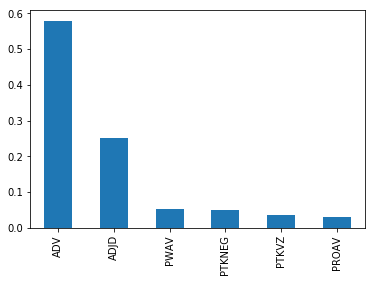

In [103]:
(data.tag.value_counts() / data.tag.value_counts().sum()).plot(kind = 'bar')

## Tokens in den einzelnen Tags

In [104]:
adv = set(data[data.tag == 'ADV'].word)
print(adv)
print(len(adv))

{'vorerst', 'zuerst', 'sehnlichst', 'heuer', 'höchstens', 'stets', 'ganz', 'leise', 'zwar', 'hier', 'drüben', 'einigermaßen', 'mitten', 'bloß', 'je', 'zusammen', 'herzlichst', 'damals', 'fast', 'quer', 'herunter', 'etwa', 'einfach', 'irgendwo', 'nächstens', 'lieber', 'durchaus', 'z.b.', 'so', 'geradezu', 'nachmittags', 'fortan', 'nun', 'wahrhaft', 'oft', 'allerdings', 'vielleicht', 'vormittag', 'usw.', 'nebeneinander', 'wieder', 'eben', 'hinüber', 'bald', 'bitte', 'abend', 'dann', 'apropos', 'hoffentlich', 'aber', 'sogar', 'ja', 'droben', 'ebenso', 'gar', 'kaum', 'sofort', 'allein', 'jedesmal', 'selbst', 'wohl', 'eigentlich', 'drin', 'jedenfalls', 'sicherlich', 'wem', 'südwärts', 'natürlich', 'rings', 'endlich', 'morgen', 'anbei', 'nämlich', 'ziemlich', 'vielmals', 'wochenlang', 'zugleich', 'zu', 'unten', 'anderswo', 'mir', 'tausendmal', 'manchmal', 'lange', 'just', 'überall', 'schleunigst', 'noch', 'immer', 'wenigstens', 'vorgestern', 'einmal', 'mich', 'meist', 'anfangs', 'doch', 'lei

In [105]:
adjd = set(data[data.tag == 'ADJD'].word)
print(adjd)
print(len(adjd))

{'unermüdlich', 'vorläufig', 'frei', 'friedlich', 'schön', 'hergelaufen', 'erfrischt', 'herrlich', 'einzig', 'einsam', 'lieb', 'später', 'stillschweigend', 'wahrscheinlicher', 'grell', 'poetisch', 'weit', 'schnell', 'ganz', 'leise', 'lang', 'unklar', 'hoffnungslos', 'warm', 'rötlich', 'tiefer', 'kolossal', 'schwach', 'tausend', 'schonend', 'spät', 'spielend', 'lächerlich', 'krank', 'breiter', 'unbegreiflich', 'kurz', 'munter', 'lebhaft', 'lächelnd', 'realistisch', 'unruhig', 'unfaßbar', 'behaglich', 'auffallend', 'täglich', 'quer', 'wahrscheinlich', 'geräuschvoll', 'ähnlicher', 'berauschend', 'geheimnisvoll', 'unveränderlich', 'still', 'einfach', 'vernehmlich', 'kläglich', 'tot', 'allgemein', 'raffiniert', 'geleckt', 'endlos', 'stehts', 'tragisch', 'offiziell', 'rasch', 'frech', 'schrill', 'scheu', 'wahrhaft', 'stürmisch', 'aufgekeimt', 'häufig', 'massenhaft', 'speziell', 'flach', 'weh', 'bläulich', 'befreundet', 'hell', 'erschüttert', 'biegsam', 'übermütig', 'verblüht', 'unbeschreibli

In [106]:
pwav = set(data[data.tag == 'PWAV'].word)
print(pwav)
print(len(pwav))

{'warum', 'wo', 'wofür', 'wohin', 'woher', 'worauf', 'weshalb', 'wann', 'wie', 'wozu', 'wobei'}
11


In [107]:
ptkvz = set(data[data.tag == 'PTKVZ'].word)
print(ptkvz)
print(len(ptkvz))

{'las', 'weg', 'herum', 'hin', 'heran', 'hinauf', 'aus', 'fort', 'voraus', 'hinaus', 'umher', 'auf', 'entgegen', 'zusammen', 'vor', 'zugrunde', 'heraus', 'herbei', 'heim', 'gegenüber', 'bei', 'herunter', 'vorbei', 'an', 'still', 'hinein', 'da', 'mit', 'weiter', 'herein', 'zu', 'keine', 'fest', 'ab'}
34


In [108]:
proav = set(data[data.tag == 'PROAV'].word)
print(proav)
print(len(proav))

{'hinüber', 'daraus', 'dazwischen', 'daneben', 'dahin', 'darin', 'daher', 'davon', 'deshalb', 'darunter', 'dagegen', 'daran', 'dazu', 'dadurch', 'dramatis', 'damit', 'danach', 'dafür', 'davor', 'trotzdem', 'dabei', 'darauf', 'darüber'}
23
